<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter6/KernelPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.12


# Example 6.18
## Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from math import pi
from numpy.linalg import norm, inv, eigh
from sklearn.decomposition import KernelPCA
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(12345)

## Generate events

25


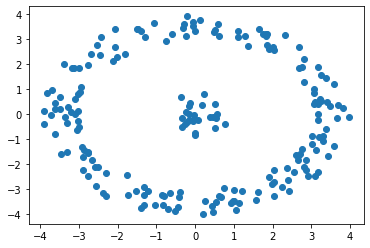

In [4]:
n  = 200
theta = np.random.uniform(0, 2*pi, n)
r1 = 1
r2 = 3
r3 = 4
a = int(n*r1*r1/(r3*r3-r2*r2+r1*r1))
r = np.concatenate((np.random.uniform(0, 1.0, a),np.random.uniform(3.0, 4.0, n-a)))
#np.random.shuffle(r)
print(a)
x = np.zeros((2,n))
x[0] = r * np.cos(theta)
x[1] = r * np.sin(theta)
plt.scatter(x[0], x[1])
plt.show()

[20.21692838 19.42993847 18.43166568 17.22324772 15.23904586 12.69469871
 12.24043345  9.90552491  9.16252607]


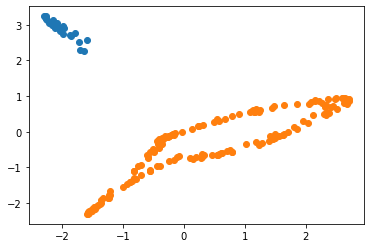

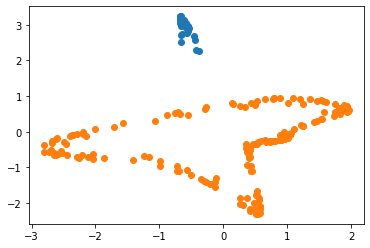

In [5]:
def k(u1,u2):
    return(np.exp(-0.5*norm(u1-u2)**2))

K = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K[i,j] = k(x.T[i],x.T[j])

XXT = K - 1/n*np.ones((n,n))@ K - 1/n*K@ np.ones((n,n)) + 1/n/n*np.ones((n,n))@K@np.ones((n,n))

eValue, eVector = eigh(XXT)
idx = eValue.argsort()[::-1]   

eValue = eValue[idx]
eVector = eVector[:,idx]

m=9

meValue = eValue[0:m]
meVector = eVector[:,0:m]
print(meValue)

zm = meVector.T @ K

## 1st vs 2nd feature
plt.scatter(zm[0][0:a], zm[1][0:a])
plt.scatter(zm[0][a:], zm[1][a:])

plt.show()

## 3rd vs 2nd feature
plt.scatter(zm[2][0:a], zm[1][0:a])
plt.scatter(zm[2][a:], zm[1][a:])

plt.show()

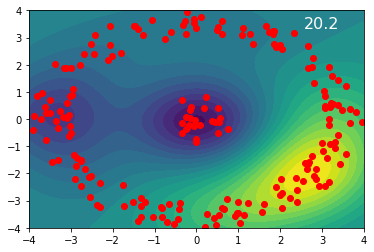

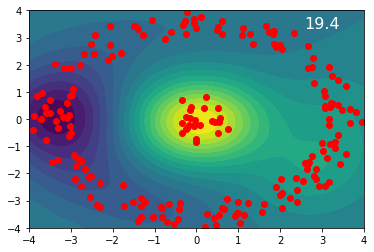

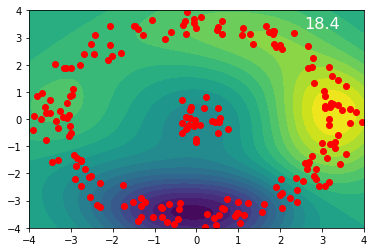

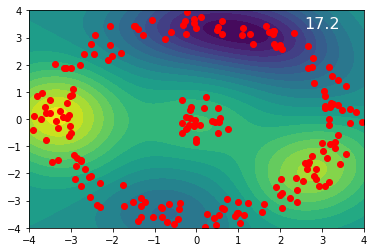

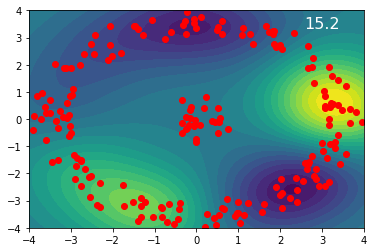

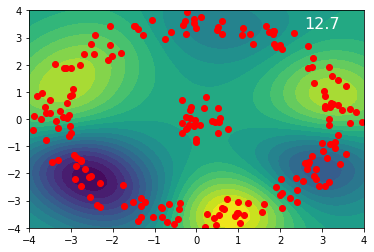

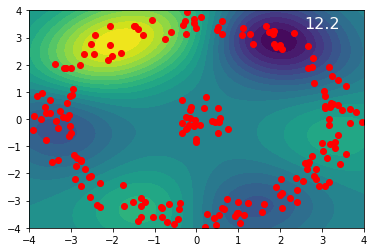

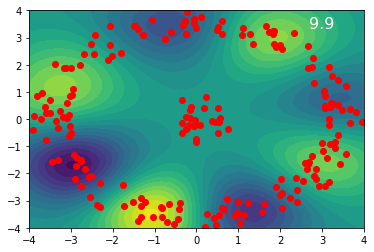

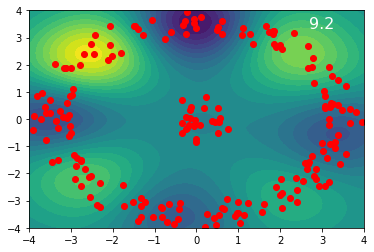

In [6]:
Ng = 200
xCon = np.linspace(-4, 4, Ng)
yCon = np.linspace(-4, 4, Ng)

X = np.zeros((Ng*Ng))
Y = np.zeros((Ng*Ng))
Z = np.zeros((m, Ng*Ng))
kk = 0
for i in range(Ng):
  for j in range(Ng):
    xx = np.array([xCon[i],yCon[j]])
    kx = np.zeros(n)
    for ii in range(n):
      kx[ii] = k(x.T[ii],xx.T)
    #print(np.max(kx))
    zz = meVector.T @ kx
    X[kk] = xCon[i]
    Y[kk] = yCon[j]
    for p in range(m):
      Z[p][kk] = zz[p]
    kk = kk + 1

for p in range(m):
  plt.contourf(X.reshape(Ng,Ng), Y.reshape(Ng,Ng), Z[p].reshape(Ng,Ng), 20)
  plt.scatter(x[0], x[1], color='red')
  plt.text(3.0, 3.5, round(meValue[p],1), ha='center', va='center', fontsize=16, color="white")
  plt.show()